# Modelo de Regresión Lineal, usando datos simulados

* y = a + b * x

* X :  100 valores distribuidos según una N(mu = 1.5, sd = 2)

* Y = 5 + 1.9 * x + e

* e :  valores distribuidos según una N(0, 0.75)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = 1.5 + 2 * np.random.randn(100)

(array([ 4.,  5.,  6., 18., 21., 12., 20., 10.,  2.,  2.]),
 array([-3.08568295, -2.09153069, -1.09737842, -0.10322615,  0.89092611,
         1.88507838,  2.87923065,  3.87338291,  4.86753518,  5.86168744,
         6.85583971]),
 <a list of 10 Patch objects>)

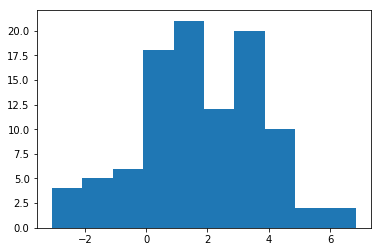

In [3]:
plt.hist(x)

In [4]:
res = 0 + 0.9*np.random.randn(100)

(array([ 9., 14., 12., 24., 12., 14.,  7.,  6.,  0.,  2.]),
 array([-1.88845049e+00, -1.41631053e+00, -9.44170562e-01, -4.72030599e-01,
         1.09365149e-04,  4.72249329e-01,  9.44389293e-01,  1.41652926e+00,
         1.88866922e+00,  2.36080918e+00,  2.83294915e+00]),
 <a list of 10 Patch objects>)

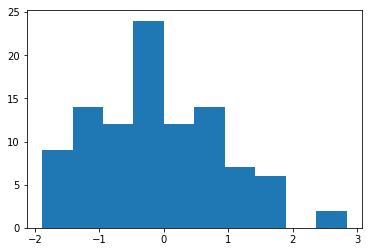

In [5]:
plt.hist(res)

In [6]:
y_pred = 4 + 2 * x

In [7]:
y_actual = 4 + 2 * x + res

In [8]:
x_list=x.tolist()
y_pred_list=y_pred.tolist()
y_act_list=y_actual.tolist()

In [9]:
data=pd.DataFrame({"x":x_list, "y_actual":y_act_list, "y_pred":y_pred_list})
data.head()

,x,y_actual,y_pred
0,0.878473,6.001574,5.756946
1,3.183638,10.886000,10.367275
2,1.861157,7.023461,7.722314
3,3.819350,14.282156,11.638700
4,0.487501,5.577137,4.975003


Text(0.5, 1.0, 'Valor actual vs Predicción')

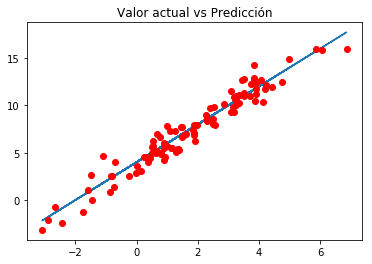

In [10]:
plt.plot(x,y_pred)
plt.plot(x,y_actual,"ro")
plt.title("Valor actual vs Predicción")

In [11]:
y_media = [np.mean(y_actual) for i in range(1, len(x_list)+1)]

Text(0.5, 1.0, 'Valor actual vs Predicción')

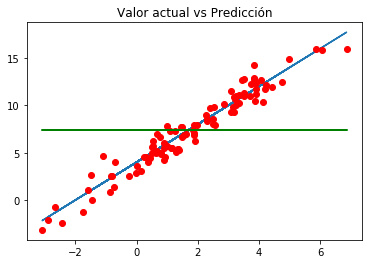

In [12]:
plt.plot(x, y_pred)
plt.plot(x, y_actual,"ro")
plt.plot(x, y_media,"g")
plt.title("Valor actual vs Predicción")

**En un mundo ideal:**

\begin{align*}
SST=SSR+SSD
\end{align*}


La suma de los cuadrados totales es igual a la suma de los cuadrados de la refresión mas la suma de los cuadrados de la diferencia.

\begin{align*}
SSR=(y_r-\bar{y})^2
\end{align*}

\begin{align*}
SSD=(y_i-y_r)^2
\end{align*}

\begin{align*}
SST=(y_i-\bar{y})^2
\end{align*}

In [13]:
data["SSR"]= (data.y_pred-y_media)**2
data["SSD"]= (data.y_pred-data.y_actual)**2
data["SST"]= (data.y_actual-y_media)**2

In [14]:
data.head()

,x,y_actual,y_pred,SSR,SSD,SST
0,0.878473,6.001574,5.756946,2.750640,0.059843,1.999050
1,3.183638,10.886000,10.367275,8.713261,0.269076,12.044709
2,1.861157,7.023461,7.722314,0.094165,0.488396,0.153657
3,3.819350,14.282156,11.638700,17.835828,6.987861,47.151634
4,0.487501,5.577137,4.975003,5.955791,0.362565,3.379402


In [15]:
SSR=sum(data.SSR)
SSD=sum(data.SSD)
SST=sum(data.SST)
print(SSR)
print(SSD)
print(SST)

1599.27319671937
100.02731929511987
1747.279454744992


In [16]:
SSR+SSD

1699.3005160144899

Calculemos el coeficiente de correlación mediante la siguiente fórmula:
\begin{align*}
R^2=\frac{SSR}{SST}
\end{align*}

In [17]:
R2=SSR/SST
print(R2)

0.9152933106243025


## Obteniendo la recta de regresión

 La recta de regresión lineal simple tiene la siguiente forma:
 
 \begin{align*}
 y=a+bx
 \end{align*}
 
 donde a es la ordenada al origen y b la pendiente
 
 Los parámetros de la regresión simple se calculan mediante:
 
\begin{align*}
b=\frac{\sum(x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^2}
\end{align*}

\begin{align*}
a=\bar{y}-b\bar{x}
\end{align*}

In [18]:
x_mean=np.mean(data.x)
y_mean=np.mean(data.y_actual)
x_mean,y_mean

(1.7590976117470924, 7.4154516632836)

In [19]:
data["b_numerador"]=(data.x-x_mean)*(data.y_actual-y_mean)
data["b_denominador"]=(data.x-x_mean)**2

In [20]:
data.head()

,x,y_actual,y_pred,SSR,SSD,SST,b_numerador,b_denominador
0,0.878473,6.001574,5.756946,2.750640,0.059843,1.999050,1.245095,0.775499
1,3.183638,10.886000,10.367275,8.713261,0.269076,12.044709,4.943935,2.029314
2,1.861157,7.023461,7.722314,0.094165,0.488396,0.153657,-0.040006,0.010416
3,3.819350,14.282156,11.638700,17.835828,6.987861,47.151634,14.147145,4.244640
4,0.487501,5.577137,4.975003,5.955791,0.362565,3.379402,2.337594,1.616957


In [21]:
b=sum(data.b_numerador)/sum(data.b_denominador)

In [22]:
a=y_mean-b*x_mean

In [23]:
a,b

(3.8421240666662717, 2.031341281322295)

\begin{align*}
y_{modelo}=4.0462+0.86379x
\end{align*}

El modelo de regresión ya contiene el parametro dado por el error con el que se había iniciado el problema. Al ya estar ajustado es posible pensar que se puede obtener una mejor predicción del ejemplo:

In [24]:
data["y_modelo"]=a+b*data.x
data.head()

,x,y_actual,y_pred,SSR,SSD,SST,b_numerador,b_denominador,y_modelo
0,0.878473,6.001574,5.756946,2.750640,0.059843,1.999050,1.245095,0.775499,5.626603
1,3.183638,10.886000,10.367275,8.713261,0.269076,12.044709,4.943935,2.029314,10.309178
2,1.861157,7.023461,7.722314,0.094165,0.488396,0.153657,-0.040006,0.010416,7.622770
3,3.819350,14.282156,11.638700,17.835828,6.987861,47.151634,14.147145,4.244640,11.600528
4,0.487501,5.577137,4.975003,5.955791,0.362565,3.379402,2.337594,1.616957,4.832406


In [25]:
SSR_2= sum((data.y_modelo-y_mean)**2)
SSD_2= sum((data.y_modelo-data.y_actual)**2)
SST_2= sum((data.y_actual-y_mean)**2)

In [26]:
print(SSR_2)
print(SSD_2)
print(SST_2)

1648.7002320234892
98.57922272150243
1747.2794547449917


In [27]:
SSR_2+SSD_2

1747.2794547449917

In [28]:
R2_2=SSR_2/SST_2
print(R2_2)

0.9435813072409246


Text(0.5, 1.0, 'Valor actual vs Predicción')

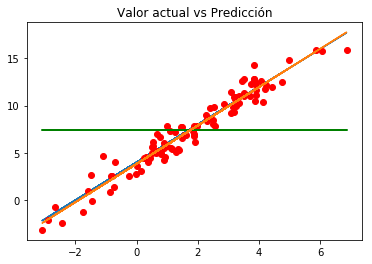

In [29]:
plt.plot(data.x, data.y_pred)
plt.plot(data.x, data.y_actual,"ro")
plt.plot(data.x, y_media,"g")
plt.plot(data.x, data.y_modelo)
plt.title("Valor actual vs Predicción")

## P value

**Supocisión:**
El modelo presenta una relación lineal entre X y Y:

\begin{align*}
y_{estimada}=a+bx
\end{align*}

Para determinar si dicha relación es real, se plantea la siguiente hipótesis:

\begin{align*}
H_{0}:b=0
\end{align*}

\begin{align*}
H_{1}:b\not=0
\end{align*}


Si el p value resultante es mayor que el nivel de significancia ($\alpha$) de la prueba de hipótesis, podemos asegurar que b es igual a cero. Con ello el valor en la ecuación nos daría que Y es identicamente igual al valor de a, y por lo tanto X y Y no están relacionados. Por otra parte, si el p value es  menor que el nivel de significancia, podemos rechazar la hipótesis nula y aceptar que existe una relación lineal entre X y Y

## Error estandar de los residuos (RSE)

\begin{align*}
RSE=\sqrt{\frac{SSD}{n-k-1}}
\end{align*}

Donde $n$ representa el número de filas en el DataFrame, $k$ el número de variables predictoras.

In [31]:
RSE=np.sqrt(SSD/(len(data)-2))
RSE

1.0102905184068867

In [32]:
np.mean(data.y_actual)

7.4154516632836

In [33]:
RSE/np.mean(data.y_actual)

0.13624126543891796

## Regresión Lineal en Python

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
df=pd.read_csv("\Datasets\Advertisement.csv")

FileNotFoundError: [Errno 2] File b'\\Datasets\\Advertisement.csv' does not exist: b'\\Datasets\\Advertisement.csv'